In [95]:
from pandas import read_csv
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import os

In [96]:
audioDataPath = 'C:/Users/aanal/Documents/AML-Lab/audios_VSD'

In [97]:
audioFiles = os.listdir(audioDataPath)
# audioFiles

In [98]:
def duration(signal, sr):
    '''
    	function: duration -> find the duration of the audio file
        arg: signal -> an array that contains the waveform of audio file
        	 sr -> sampling rate
        return: audioDuration -> returs the duration of audio file in seconds
    '''
    audioDuration = librosa.get_duration(y=signal, sr=sr)
    return audioDuration # gives duration of the audio file in seconds

In [103]:
def durationPlot(durationLst):
    '''
    	function: durationPlot -> plots the graph of duration list
        arg: durationLst -> list that conatins the durations of each audio files
        return: None 
    '''
    plt.hist(durationLst, bins=30, edgecolor='black')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()

In [104]:
def waveFormPlot(signal, sr, i):
    '''
    	function: waveFormPlot -> plots the waveform of audio file
        arg: signal -> an array that contains the waveform of audio file
        	 sr -> sampling rate
             i -> ittration
        return: None
    '''
    plt.figure(figsize=(10, 4))
    signal = np.asarray(signal).flatten()
    librosa.display.waveshow(signal, sr=sr)
    plt.title('Waveform - {}'.format(i))
    plt.show()

In [105]:
def melFreq(signal, sr, i):
    '''
    	function: melFreq -> calculates the mfccs of audio signal and plots it
        arg: signal -> an array that contains the waveform of audio file
        	 sr -> sampling rate
             i -> ittration
        return: None
    '''
    signal = np.asarray(signal).flatten()
    mfccs = librosa.feature.mfcc(y=signal, sr=sr) #  Mel-frequency cepstral coefficients -> gives a matrix rows=features and columns=frame/time frame
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs - {}'.format(i))

In [106]:
def chromaStft(signal, sr, i):
    '''
    	function: waveFormPlot -> calculates the chroma stft of audio signal and plots it
        arg: signal -> an array that contains the waveform of audio file
        	 sr -> sampling rate
             i -> ittration
        return: None
    '''
    signal = np.asarray(signal).flatten()
    chroma = librosa.feature.chroma_stft(y=signal, sr=sr) # Chroma short-time Fourier transform (STFT) -> gives a matrix rows=pitch and columns=time frame
    plt.subplot(3, 1, 2)
    librosa.display.specshow(chroma, x_axis='time')
    plt.colorbar()
    plt.title('Chroma - {}'.format(i))

In [107]:
def spectralContrast(signal, sr, i):
    '''
    	function: waveFormPlot -> calculates the spectral contrast of audio signal and plots it
        arg: signal -> an array that contains the waveform of audio file
        	 sr -> sampling rate
             i -> ittration
        return: None
    '''
    signal = np.asarray(signal).flatten()
    contrast = librosa.feature.spectral_contrast(y=signal, sr=sr) # Spectral contrast measures the difference in amplitude between peaks and valleys in the spectrum of an audio signal. -> gives a matrix rows=frequency bands and column=time frame
    plt.subplot(3, 1, 3)
    librosa.display.specshow(contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast - {}'.format(i))

for audio file 0


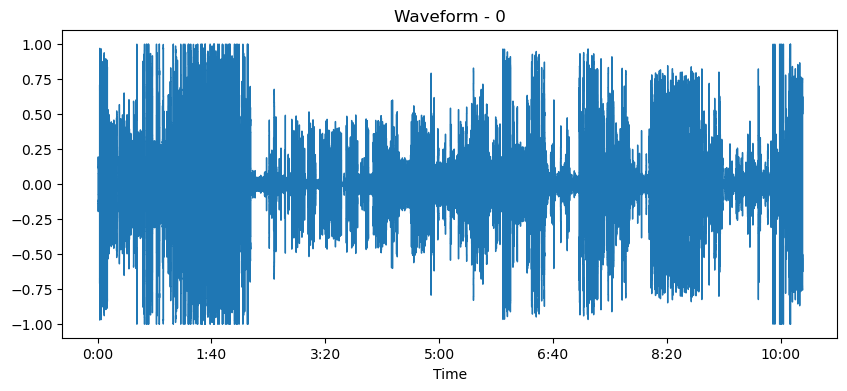

signal = [0.         0.         0.         ... 0.2130127  0.21865845 0.22409058], sr = 44100, duration = 618.8350113378685
for audio file 1


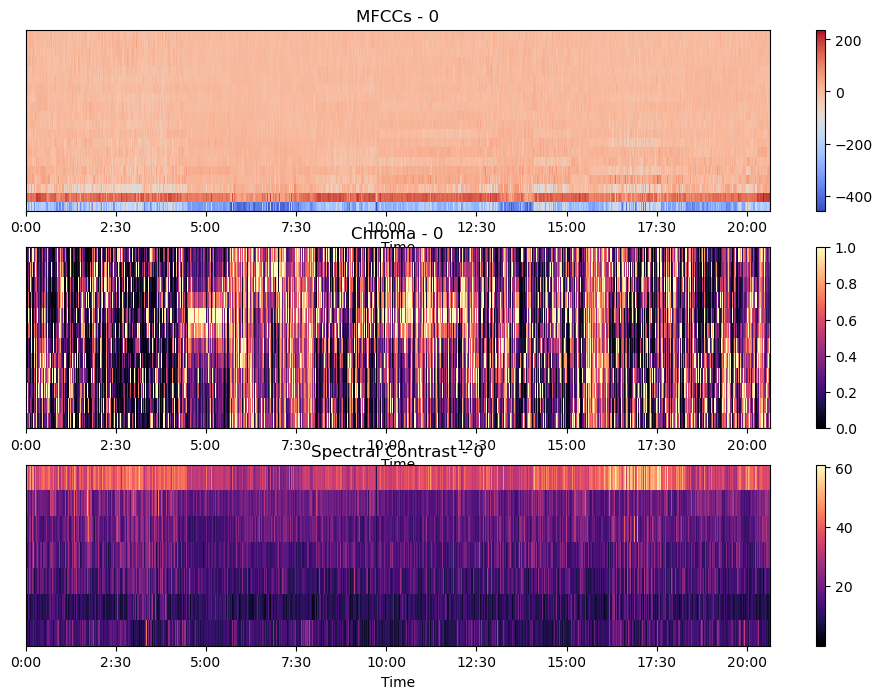

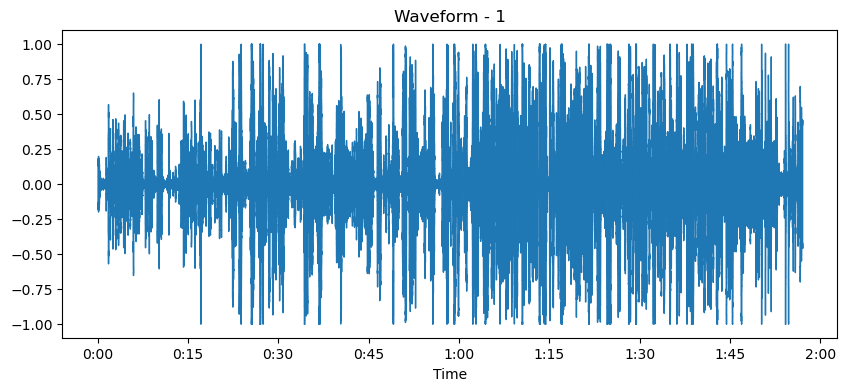

signal = [0.04354858 0.02944946 0.01376343 ... 0.14138794 0.20327759 0.2548828 ], sr = 44100, duration = 117.0
for audio file 2


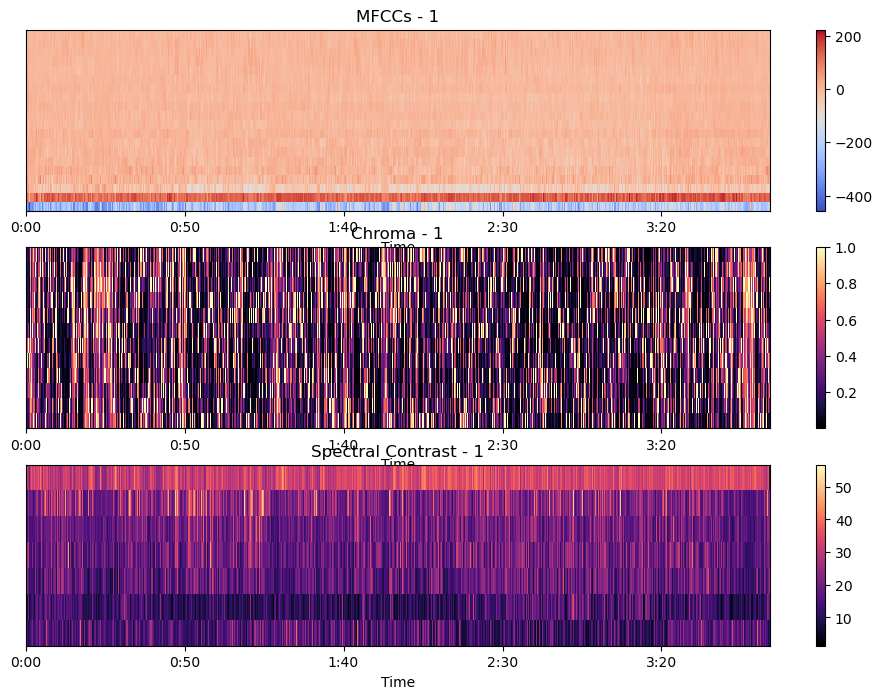

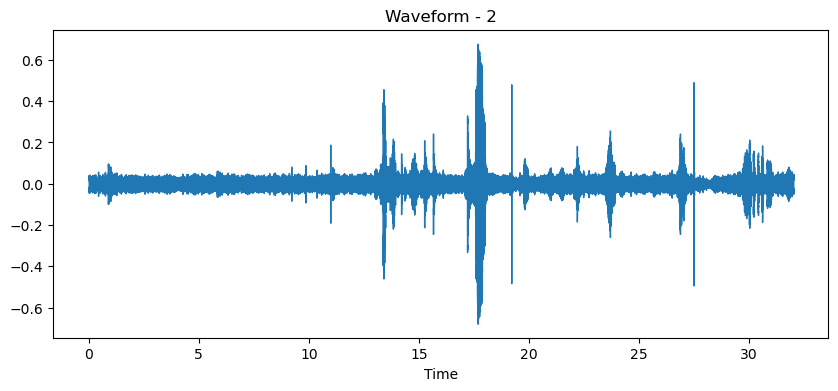

signal = [0.00645447 0.00273132 0.00480652 ... 0.00619507 0.00556946 0.00518799], sr = 44100, duration = 32.0


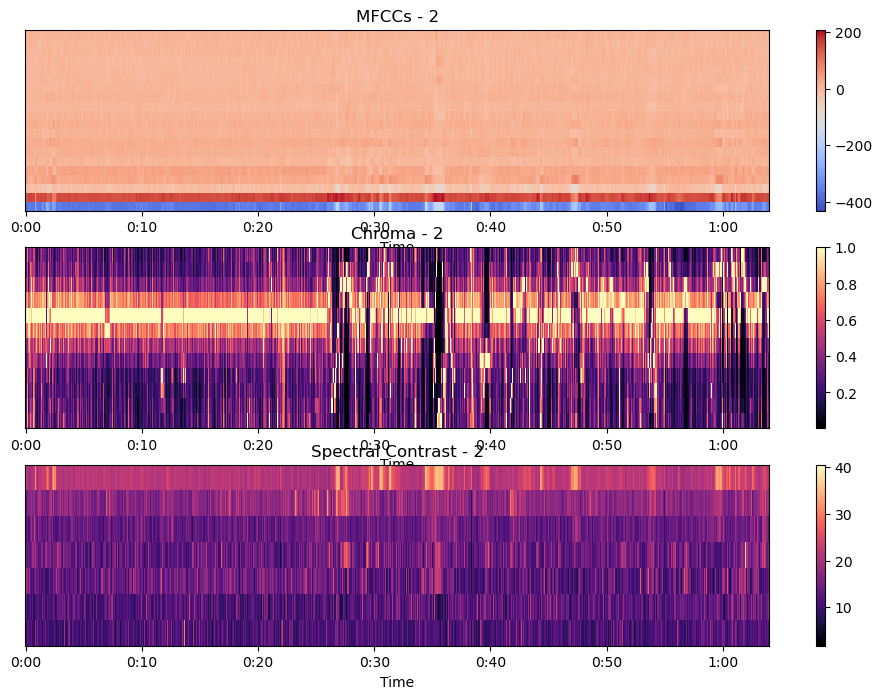

In [108]:
durationList = []

for i in range(3):
    audioPath = os.path.join(audioDataPath, audioFiles[i])
    signal, sr = librosa.load(audioPath, sr=None) # sr(sampling rate) = how many data points(audio sample) has been collected per second while converting analog signal into digital
    durations = duration(signal, sr)
    durationList.append(durations)
    print('for audio file {}'.format(i))
    waveFormPlot(signal, sr, i)
    melFreq(signal, sr, i)
    chromaStft(signal, sr, i)
    spectralContrast(signal, sr, i)
    print('signal = {}, sr = {}, duration = {}'.format(signal, sr, durations))    

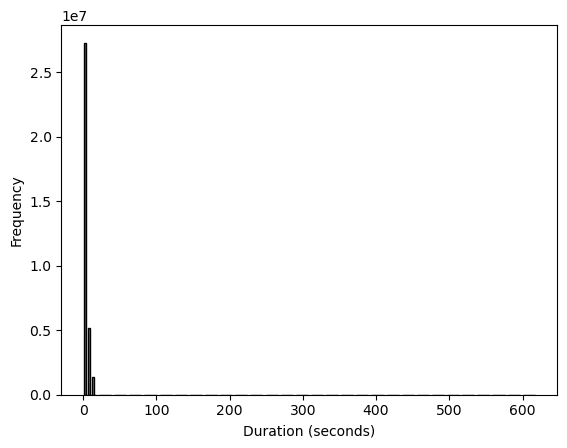

In [92]:
durationPlot(durationList)